# Ajuste de redes neuronales y reducción de dimensionalidad
Ernesto Ignacio Borbón Martínez, A01701515 <br>
José de Jesús Gutiérrez Alderete, A01637812 <br>
Luis Felipe Villaseñor Navarrete, A01023976 <br>

In [1]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import statistics
import numpy as np
from sklearn import svm
from sklearn import datasets
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
import xgboost as xgb
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE

## Problema 1

### Utilicen el  conjunto de datos misteriosos 2  descargar para evaluar con validación cruzada (k-fold cross validation, k = 5) una red neuronal perceptrón de una capa.  Calculen el recall y precisión de cada clase, así como la exactitud del modelo.

In [2]:
dfm2 = pd.read_csv('misterious_data_2.txt', header = None, delimiter = "\t")
y = dfm2.iloc[:,0]
X = dfm2.iloc[:,1:]
kf = KFold(n_splits=5, shuffle = True)

In [26]:
clf = MLPClassifier(hidden_layer_sizes=(5), random_state=1, max_iter=10000)

acc = 0
rec = np.array([0., 0., 0.])
pre = np.array([0., 0., 0.])

for train_index, test_index in kf.split(X):
    
    # Training phase
    X_train = X.iloc[train_index, :]
    y_train = y.iloc[train_index]
    clf.fit(X_train, y_train)

    # Test phase
    X_test = X.iloc[test_index, :]
    y_test = y.iloc[test_index]    
    y_pred = clf.predict(X_test)
    
    acc+=(accuracy_score(y_test, y_pred))
    rec+=(recall_score(y_test, y_pred, average=None))
    pre+=(precision_score(y_test, y_pred, average=None))
    
acc = acc/5
rec = rec/5
pre = pre/5

In [27]:
print("Accuracy: ",acc)
print("Recall: ",rec)
print("Precision: ",pre)

Accuracy:  0.931822386679001
Recall:  [0.86261696 0.95672014 0.96848485]
Precision:  [0.93678805 0.9182218  0.92884615]


### Con los mismos datos, evalúen el rendimiento de una red perceptrón de al menos dos capas. 

In [28]:
clf = MLPClassifier(hidden_layer_sizes=(5,5), random_state=1, max_iter=10000)

acc = 0
rec = np.array([0., 0., 0.])
pre = np.array([0., 0., 0.])

for train_index, test_index in kf.split(X):
    
    # Training phase
    X_train = X.iloc[train_index, :]
    y_train = y.iloc[train_index]
    clf.fit(X_train, y_train)

    # Test phase
    X_test = X.iloc[test_index, :]
    y_test = y.iloc[test_index]    
    y_pred = clf.predict(X_test)
    
    acc+=(accuracy_score(y_test, y_pred))
    rec+=(recall_score(y_test, y_pred, average=None))
    pre+=(precision_score(y_test, y_pred, average=None))
    
acc = acc/5
rec = rec/5
pre = pre/5

In [29]:
print("Accuracy: ",acc)
print("Recall: ",rec)
print("Precision: ",pre)

Accuracy:  0.9232192414431083
Recall:  [0.84797555 0.95333333 0.93391813]
Precision:  [0.91904762 0.93319073 0.9425    ]


### Evalúen con validación cruzada un clasificador SVM lineal para el mismo conjunto de datos, y comparen los resultados obtenidos en los pasos anteriores.

In [33]:
clf = svm.SVC(kernel = 'linear')

acc = 0
rec = np.array([0., 0., 0.])
pre = np.array([0., 0., 0.])

for train_index, test_index in kf.split(X):
    
    # Training phase
    X_train = X.iloc[train_index, :]
    y_train = y.iloc[train_index]
    clf.fit(X_train, y_train)

    # Test phase
    X_test = X.iloc[test_index, :]
    y_test = y.iloc[test_index]    
    y_pred = clf.predict(X_test)
    
    acc+=(accuracy_score(y_test, y_pred))
    rec+=(recall_score(y_test, y_pred, average=None))
    pre+=(precision_score(y_test, y_pred, average=None))
    
acc = acc/5
rec = rec/5
pre = pre/5

In [34]:
print("Accuracy: ",acc)
print("Recall: ",rec)
print("Precision: ",pre)

Accuracy:  0.901850138760407
Recall:  [0.83748474 0.93518797 0.93869281]
Precision:  [0.86467532 0.91666667 0.93888889]


### ¿Qué clasificador escogerían para este conjunto de datos? 
El que tuvo mejor rendimiento en general fue la red neuronal perceptrón de una capa.

## Problema 2

### Para cada uno de los predictores de la base de datos Diabetes, ajuste un modelo de regresión lineal, y encuentre el error cuadrático medio (MSE) y el valor R2 de cada modelo utilizando validación cruzada (k-fold cross validation, k = 5).

In [41]:
diabetes = datasets.load_diabetes()
x = diabetes.data
y = diabetes.target
features = diabetes.feature_names
n_features = len(features)

Coeficientes del modelo:  [304.18307453]


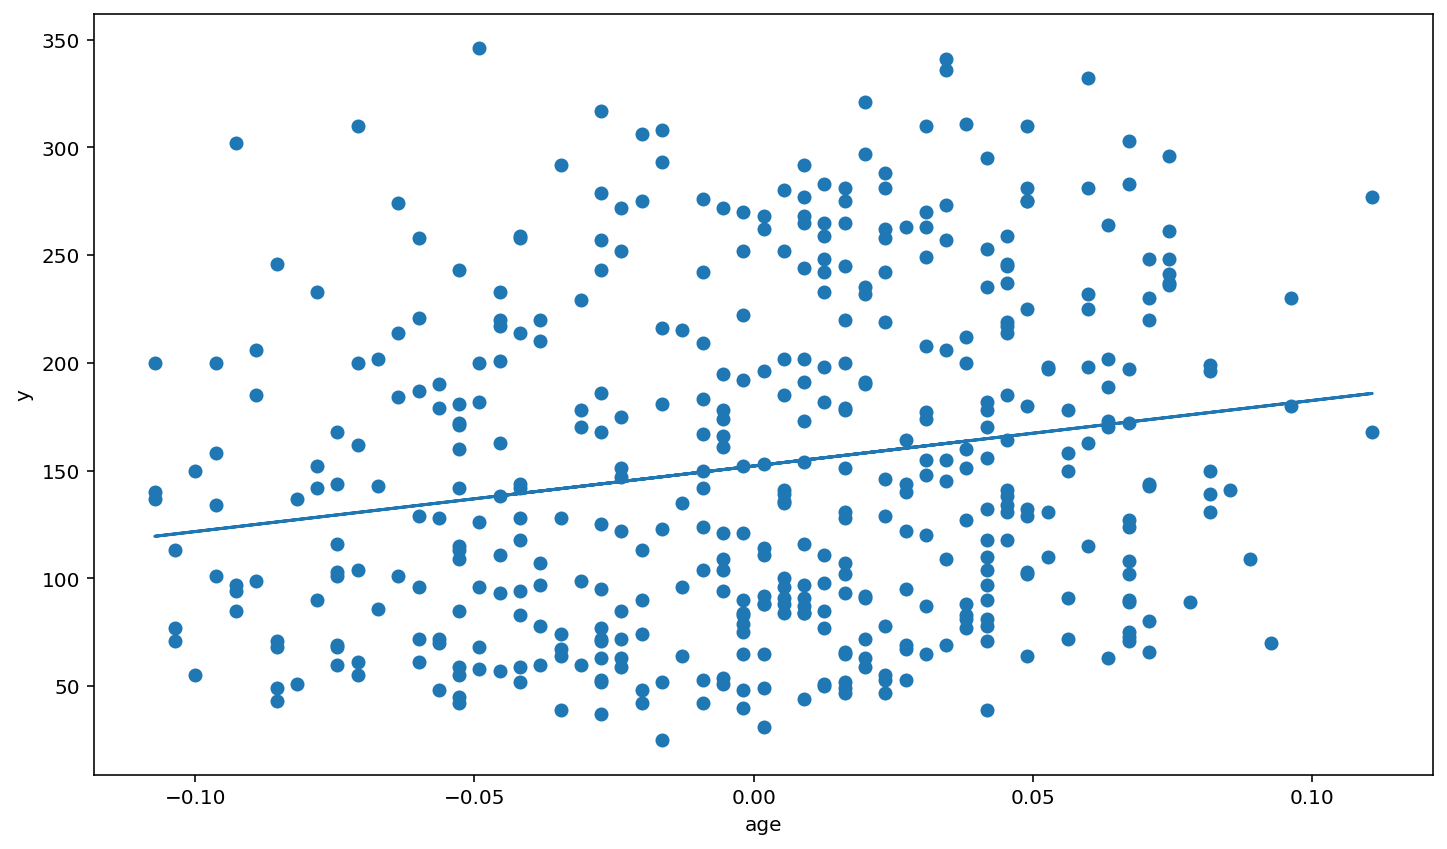

MSE =  5755.575559409227
R^2 =  0.024903073603634685
Coeficientes del modelo:  [69.71535568]


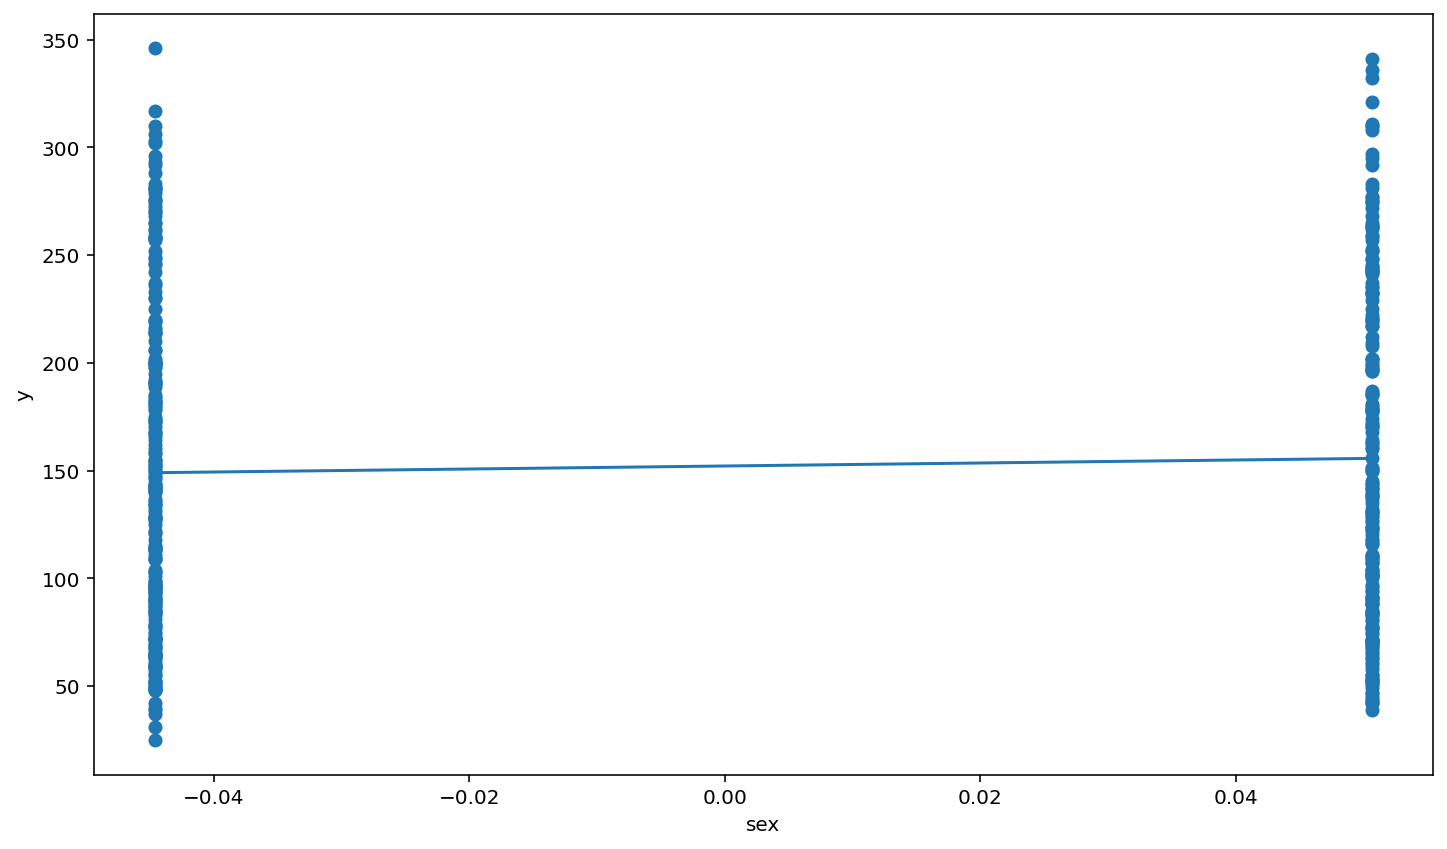

MSE =  5988.559486411243
R^2 =  -0.016837305492125632
Coeficientes del modelo:  [949.43526038]


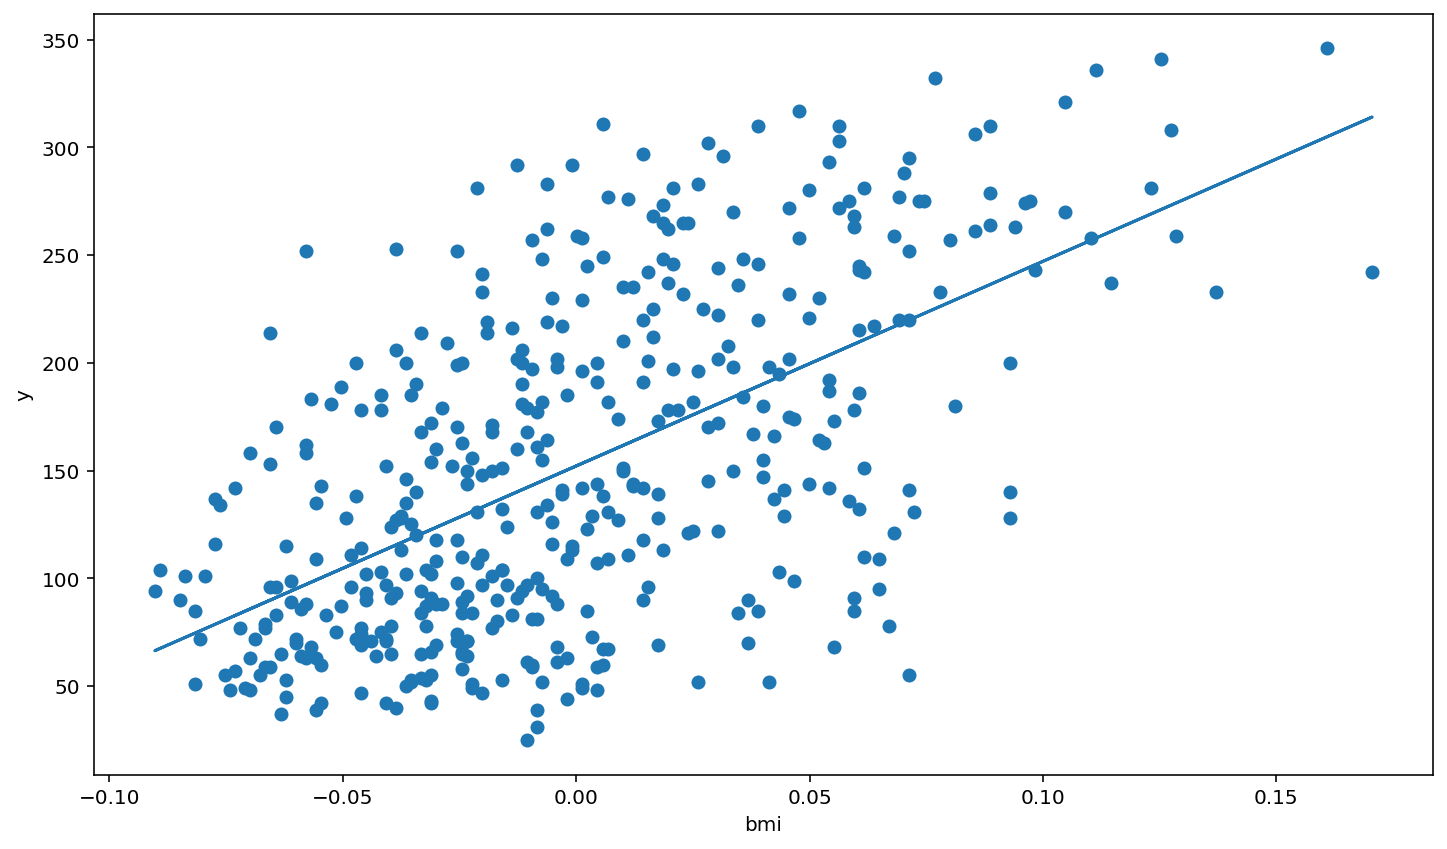

MSE =  3928.0445918176492
R^2 =  0.3380592494866116
Coeficientes del modelo:  [714.7416437]


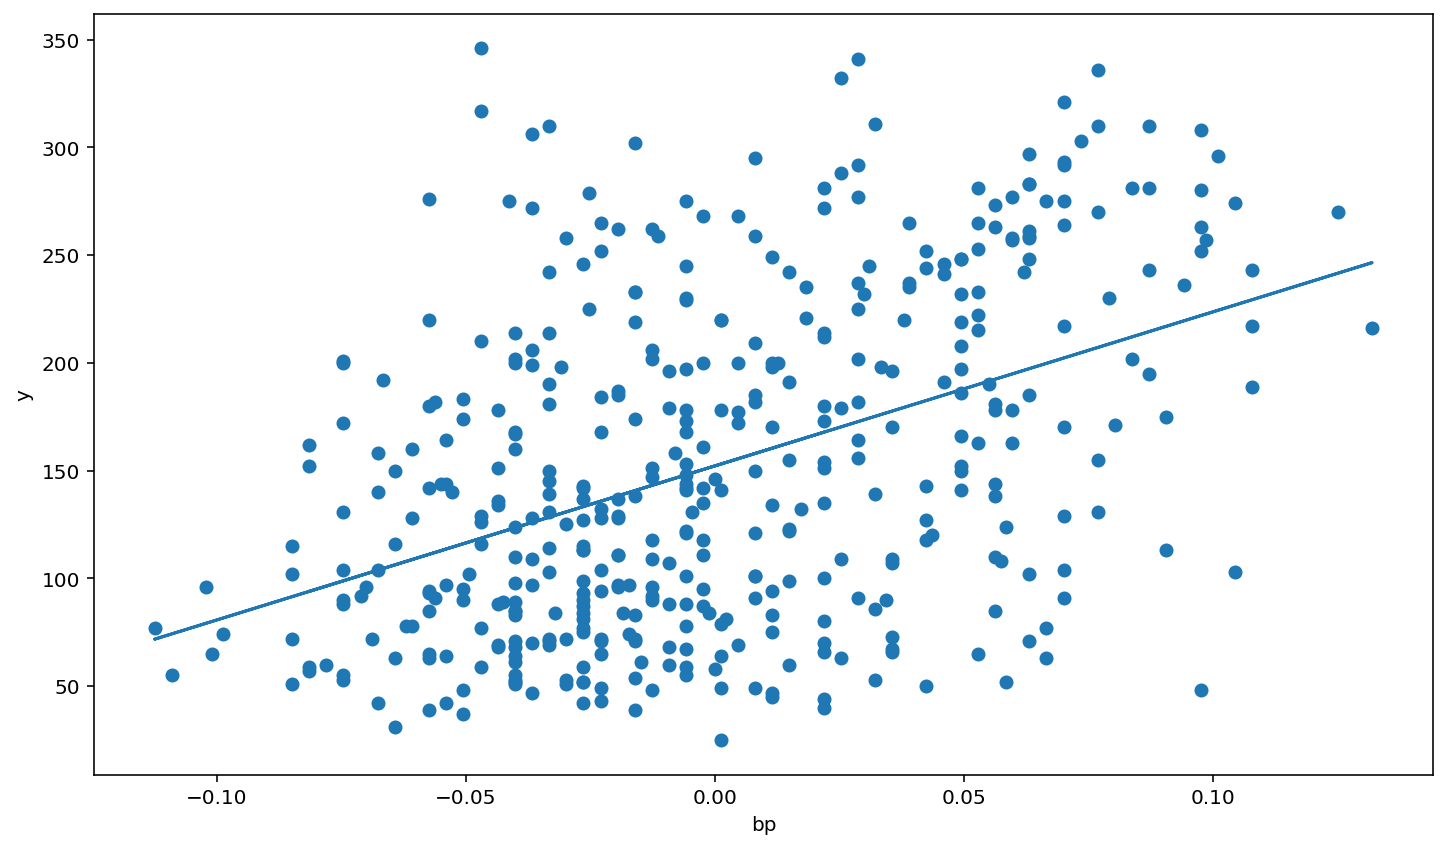

MSE =  4822.778215174996
R^2 =  0.18063711810587932
Coeficientes del modelo:  [343.25445189]


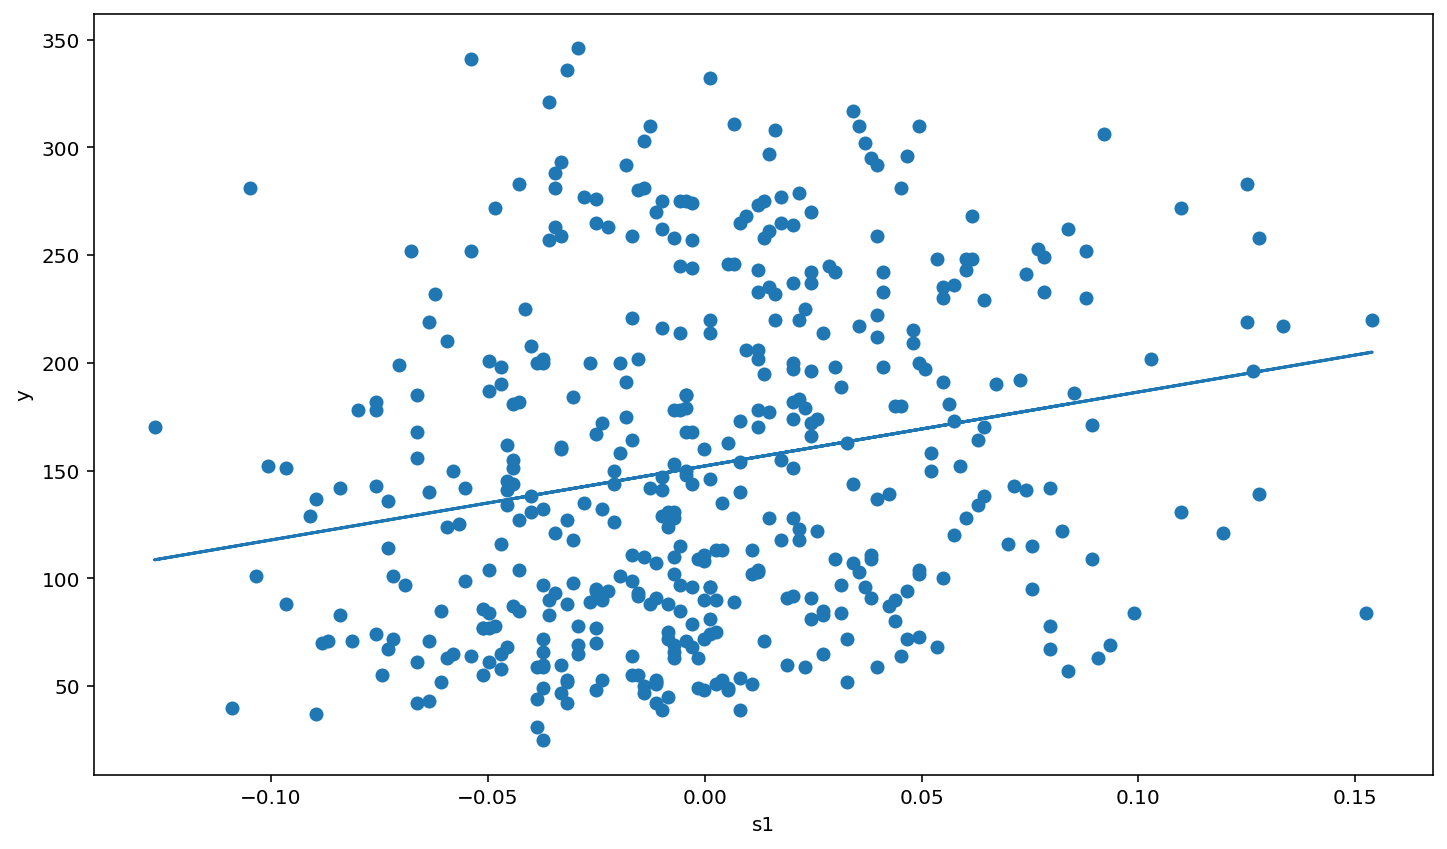

MSE =  5702.467585169506
R^2 =  0.030939480215994464
Coeficientes del modelo:  [281.78459335]


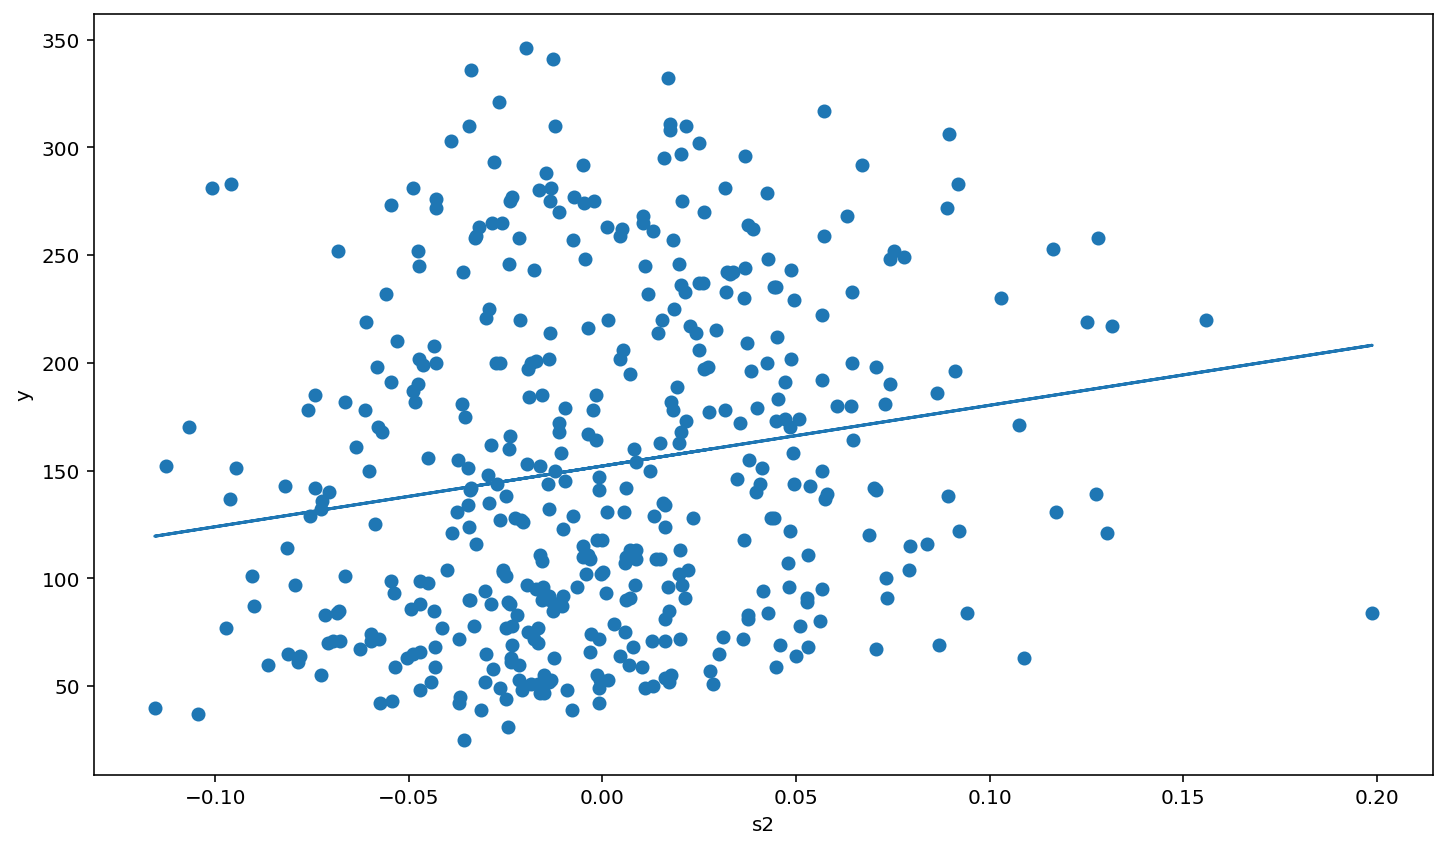

MSE =  5777.297389731973
R^2 =  0.02443990292185503
Coeficientes del modelo:  [-639.14527932]


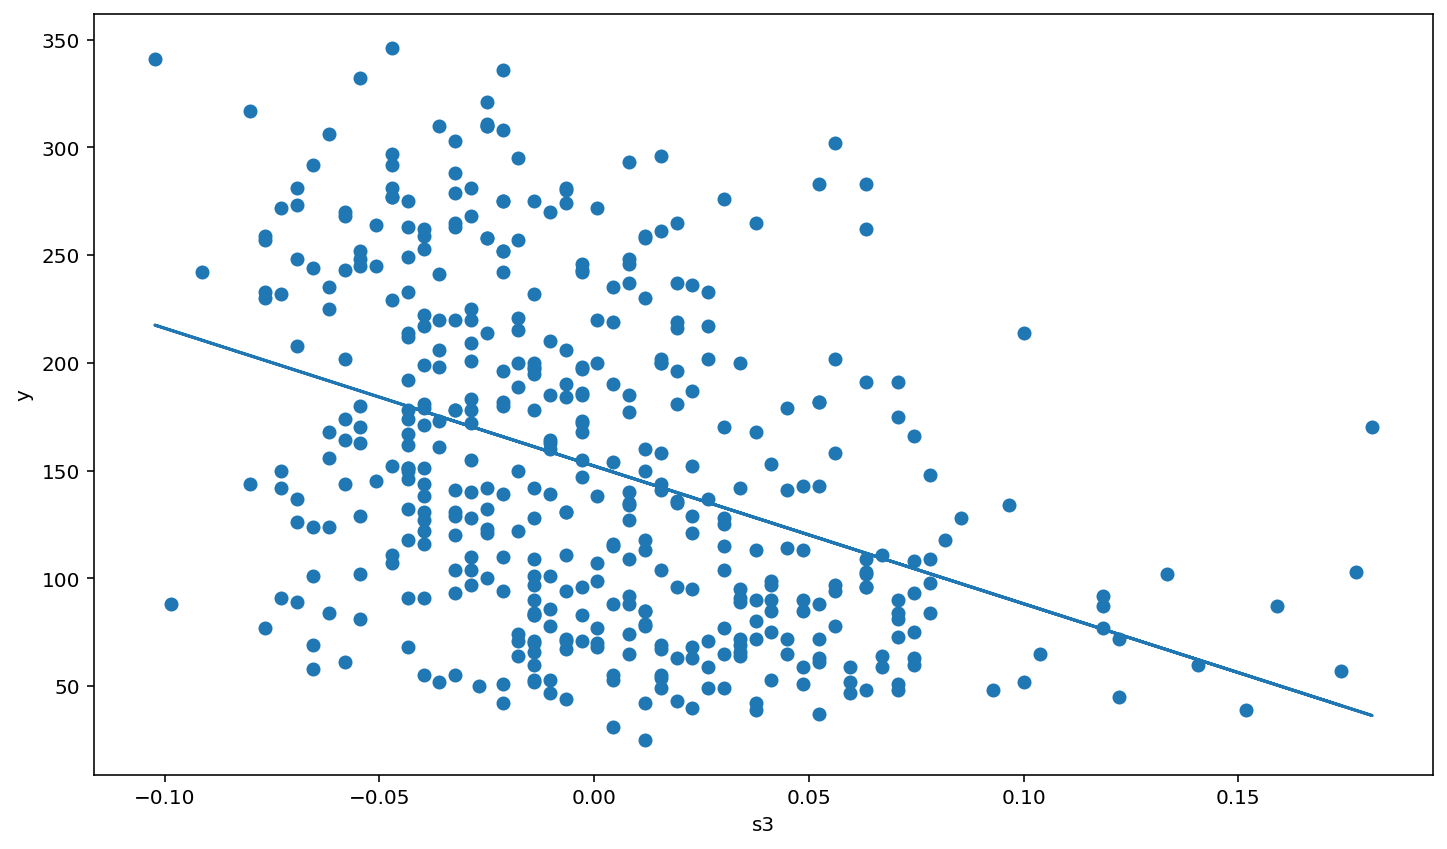

MSE =  5037.997502528848
R^2 =  0.14072049676460216
Coeficientes del modelo:  [696.88303009]


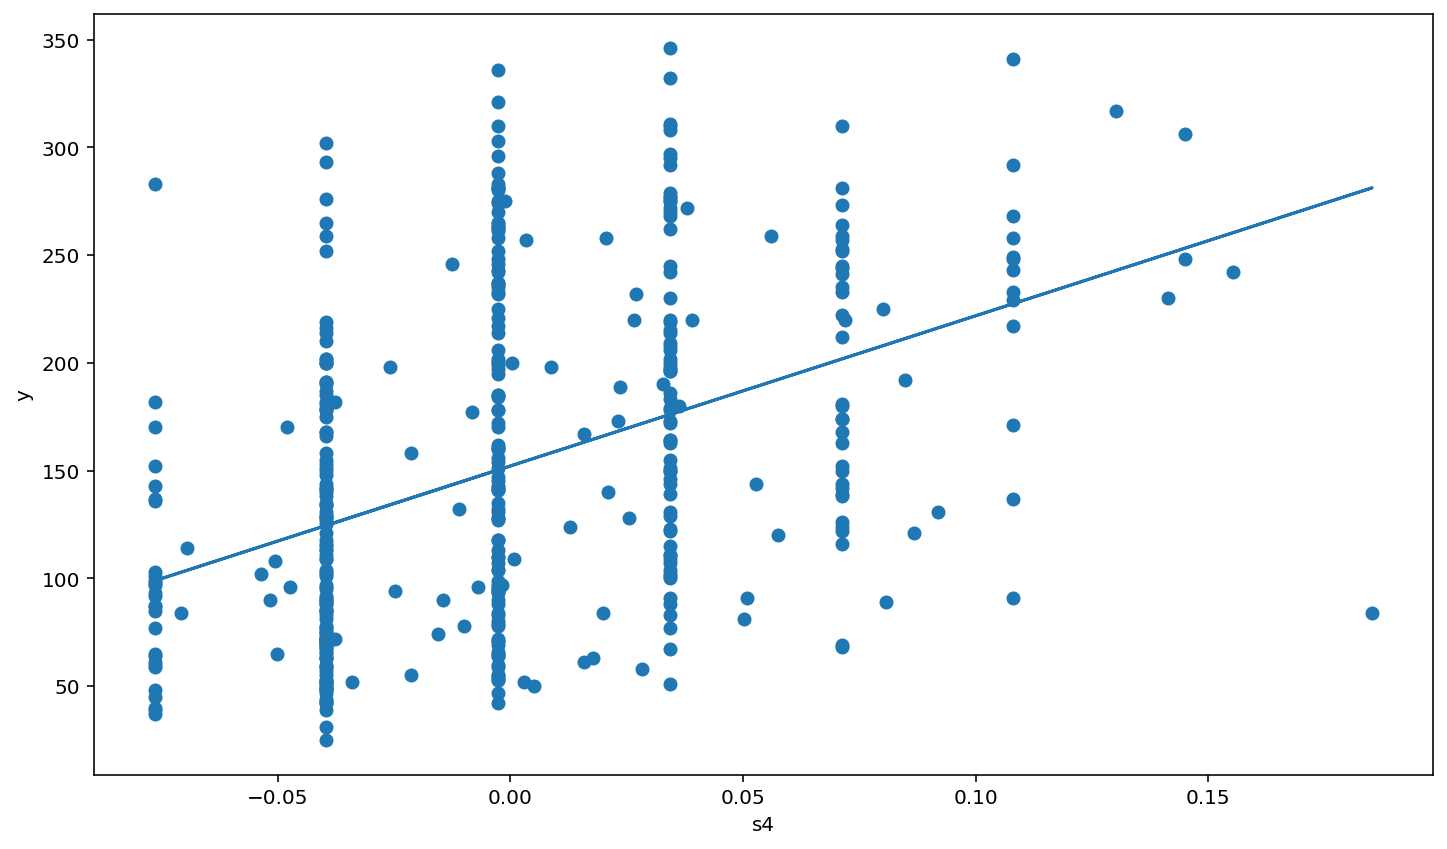

MSE =  4916.3757760102835
R^2 =  0.1477129874298599
Coeficientes del modelo:  [916.13872282]


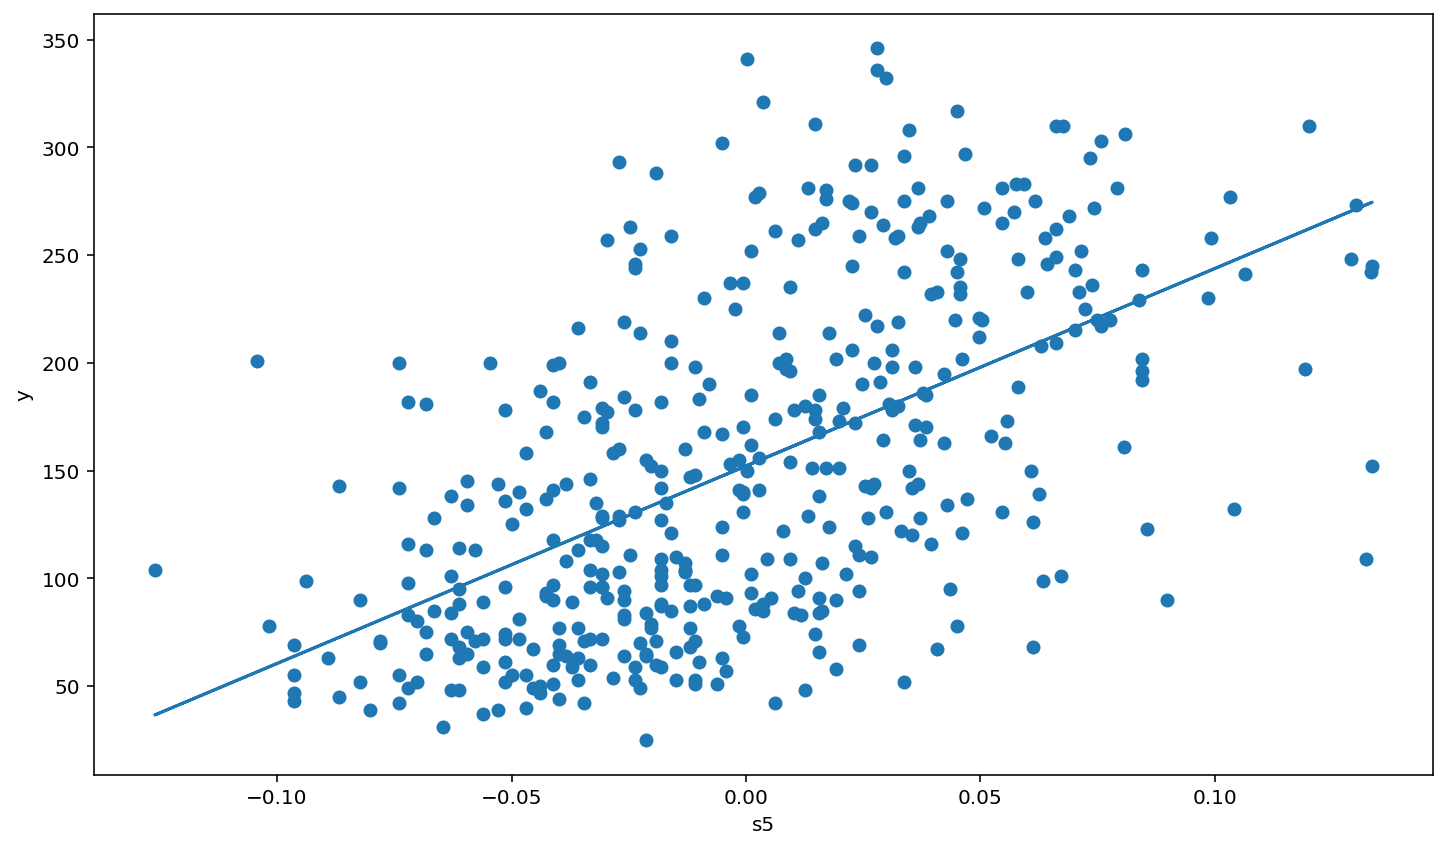

MSE =  4083.1994341829095
R^2 =  0.3033119598907967
Coeficientes del modelo:  [619.22282068]


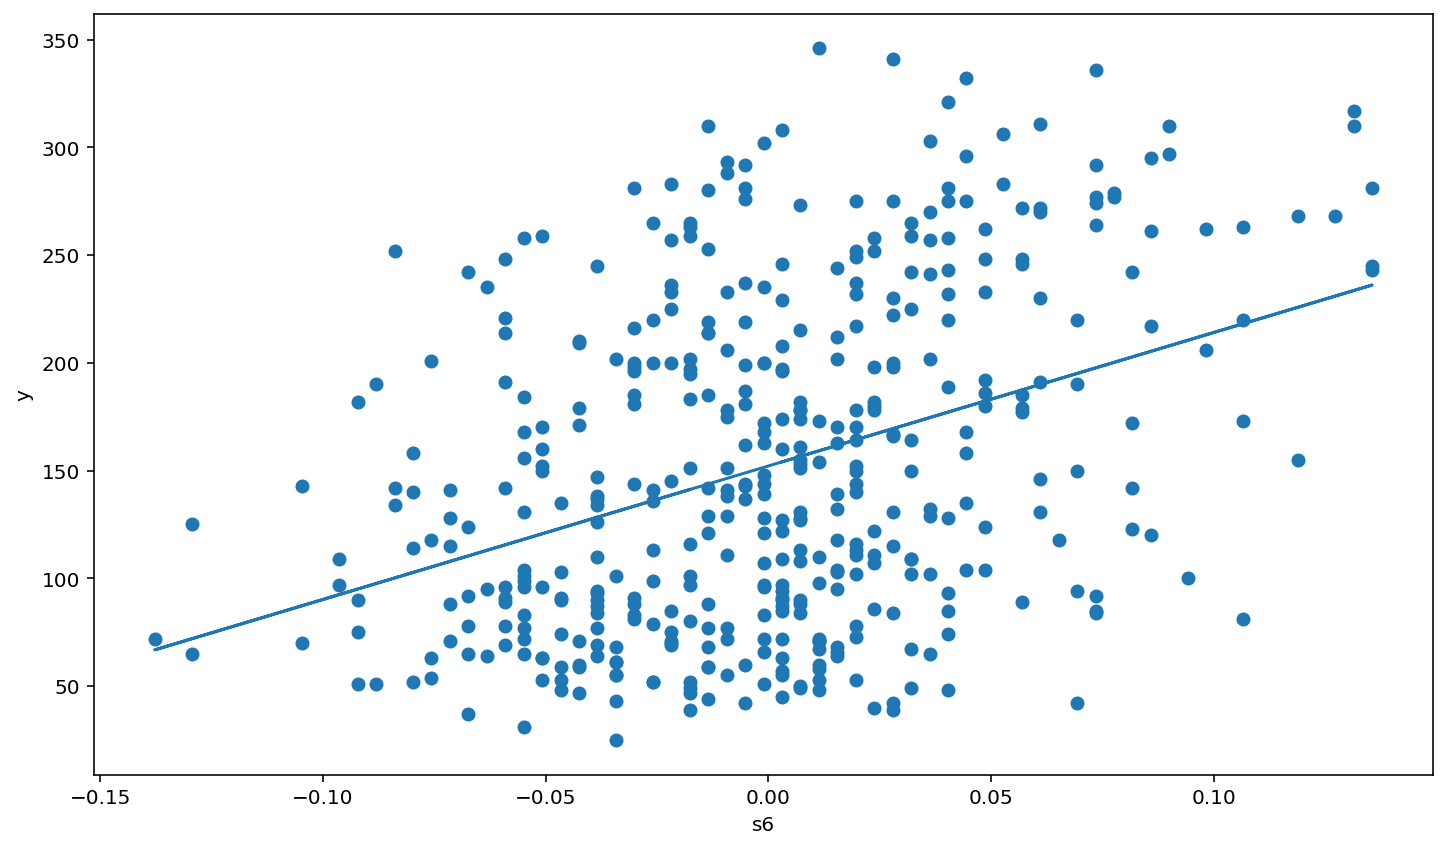

MSE =  5110.305460070713
R^2 =  0.12545118347251988


In [47]:
for var in range(n_features):
    regr = linear_model.LinearRegression()    
    regr.fit(x[:,var].reshape(-1, 1), y)    
    print("Coeficientes del modelo: ", regr.coef_)    
    y_pred = regr.predict(x[:,var].reshape(-1, 1))    
    #print('MSE: ', mean_squared_error(y, y_pred))    
    #print("R^2: ", r2_score(y, y_pred))    
    plt.scatter(x[:,var], y)    
    plt.plot(x[:,var], y_pred)    
    plt.xlabel(features[var])    
    plt.ylabel('y')    
    plt.show()    
    # 5-fold cross-validation    
    kf = KFold(n_splits=5, shuffle = True)  
    regr = linear_model.LinearRegression() 
    mse = 0 
    r2 = 0    
    for train_index, test_index in kf.split(x):     
        # Training phase    
        x_train = x[train_index, var].reshape(-1, 1)    
        y_train = y[train_index]        
        regr.fit(x_train, y_train)     
        # Test phase   
        x_test = x[test_index, var].reshape(-1, 1)  
        y_test = y[test_index]            
        y_pred = regr.predict(x_test)    
        # Calculate MSE and R^2       
        mse_i = mean_squared_error(y_test, y_pred)
        r2_i = r2_score(y_test, y_pred)            
        mse += mse_i      
        r2 += r2_i    
    mse = mse/5  
    print('MSE = ', mse)  
    r2 = r2/5    
    print('R^2 = ', r2)

Al utilizar un solo atributo, el que mejor predice "y" (la progresión de la enfermedad) es el bmi.

### Ajusten un modelo de regresión lineal para el conjunto de datos Diabetes utilizando todos los predictores, y encuentre el error cuadrático medio (MSE) y el valor R2 de dicho modelo utilizando validación cruzada (k-fold cross validation, k = 5). 

In [52]:
regr = linear_model.LinearRegression()
regr.fit(x, y)
print("Coeficientes del modelo: ", regr.coef_)
y_pred = regr.predict(x)
#print('MSE: ', mean_squared_error(y, y_pred))
#print("R^2: ", r2_score(y, y_pred))
# 5-fold cross-validation
kf = KFold(n_splits=5, shuffle = True)
mse = 0
r2 = 0
for train_index, test_index in kf.split(x):
    # Training phase    
    x_train = x[train_index, :]
    y_train = y[train_index]
    regr.fit(x_train, y_train)
    # Test phase    
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = regr.predict(x_test)
    # Calculate MSE and R^2
    mse_i = mean_squared_error(y_test, y_pred)
    r2_i = r2_score(y_test, y_pred)
    mse += mse_i
    r2 += r2_i 
mse = mse/5
print('MSE = ', mse)
r2 = r2/5
print('R^2 = ', r2)

Coeficientes del modelo:  [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
MSE =  3003.090587367654
R^2 =  0.4885495461472534


### ¿Es necesario utilizar más de un predictor para tener un buen modelo?

Al utilizar más predictores obtenemos un modelo más preciso que al utilizar un solo predictor, por lo que sí es conveniente utilizar más de un predictor pero no necesariamente todos. De igual forma, los resultados no fueron esperanzadores.

### Utilice una red neuronal multicapa (por ejemplo, la red MLP de scikitlearn) para generar un modelo de regresión para el conjunto de datos Diabetes.

In [71]:
regr = MLPRegressor(hidden_layer_sizes = (70,70) ,max_iter=800)
regr.fit(x, y)

y_pred = regr.predict(x)
#print('MSE: ', mean_squared_error(y, y_pred))
#print("R^2: ", r2_score(y, y_pred))
# 5-fold cross-validation
kf = KFold(n_splits=5, shuffle = True)
mse = 0
r2 = 0
for train_index, test_index in kf.split(x):
    # Training phase    
    x_train = x[train_index, :]
    y_train = y[train_index]
    regr.fit(x_train, y_train)
    # Test phase    
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = regr.predict(x_test)
    # Calculate MSE and R^2
    mse_i = mean_squared_error(y_test, y_pred)
    r2_i = r2_score(y_test, y_pred)
    mse += mse_i
    r2 += r2_i 
mse = mse/5
print('MSE = ', mse)
r2 = r2/5
print('R^2 = ', r2)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


MSE =  2996.096849306491
R^2 =  0.49244217486198194


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


### ¿Cuál modelo escogerían para esta base de datos? <br>
Tal vez la red neuronal. Demostró ligeramente mejor desempeño en base al MSE y el R^2 que la regresión lineal múltiple con todos los predictores, pero sin duda supera a la mejor regresión lineal con un solo atributo.

## Problema 3

### Para el conjunto de datos misteriosos 4 (4 clases), seleccionen un modelo de clasificación de su agrado para estos datos, y utilicen el método filter para reducir el número de características. Prueben limitando el número de características a 10, 20, 30, 40, ..., 100.

In [3]:
dfm4 = pd.read_csv('misterious_data_4.txt', header = None, delimiter = "\t")
dfm4.head()
y = dfm4.iloc[:,0]
x = dfm4.iloc[:,1:]

In [5]:
clf = svm.SVC()

In [6]:
ks = np.arange(10, 110, 10)
accs = []
for k in ks:    
    ffs = SelectKBest(mutual_info_classif, k=k)   
    ffs.fit(x, y)
    x_new = ffs.transform(x)
    acc = 0
    rec = np.zeros(4)
    pre = np.zeros(4) 
    for train_index, test_index in kf.split(x_new):    
        # Training phase
        x_train = x_new[train_index, :]
        y_train = y[train_index]
        clf.fit(x_train, y_train)     
        # Test phase
        x_test = x_new[test_index, :]
        y_test = y[test_index]
        y_pred = clf.predict(x_test)
        
        acc+=(accuracy_score(y_test, y_pred))
        rec+=(recall_score(y_test, y_pred, average=None))
        pre+=(precision_score(y_test, y_pred, average=None))

    acc = acc/5
    rec = rec/5
    pre = pre/5
 
    print("For k =", k)
    print("Accuracy: ",acc)
    print("Recall: ",rec)
    print("Precision: ",pre)    

For k = 10
Accuracy:  0.7336349924585218
Recall:  [0.764662   0.65745726 0.90732601 0.64985431]
Precision:  [0.81678087 0.62662142 0.8240952  0.69844156]


For k = 20
Accuracy:  0.7567119155354449
Recall:  [0.7775     0.64453441 0.91214286 0.69904762]
Precision:  [0.83441931 0.62794118 0.85056447 0.71185481]


For k = 30
Accuracy:  0.9268476621417797
Recall:  [1.         0.9875     0.92923077 0.8152381 ]
Precision:  [0.94848485 1.         0.86332687 0.88356275]


For k = 40
Accuracy:  0.9380844645550528
Recall:  [1.         0.98947368 0.90923077 0.85537725]
Precision:  [0.98888889 1.         0.8821721  0.90666667]


For k = 50
Accuracy:  0.9383107088989442
Recall:  [1.         0.98666667 0.905      0.85761905]
Precision:  [1.         1.         0.88478632 0.88623749]


For k = 60
Accuracy:  0.9459276018099547
Recall:  [1.         1.         0.93251454 0.86666667]
Precision:  [1.         1.         0.88662519 0.91846154]


For k = 70
Accuracy:  0.9460030165912519
Recall:  [1.         1.         0.91892857 0.85370927]
Precision:  [1.         1.         0.86477273 0.90683761]


For k = 80
Accuracy:  0.9420814479638009
Recall:  [1.         1.         0.93441931 0.84948107]
Precision:  [1.         1.         0.86352244 0.91333333]


For k = 90
Accuracy:  0.9536199095022626
Recall:  [1.         1.         0.9457265  0.86128205]
Precision:  [1.         1.         0.86803922 0.94643357]


For k = 100
Accuracy:  0.9383107088989442
Recall:  [1.         1.         0.90562771 0.83112002]
Precision:  [1.         1.         0.8231685  0.92248366]


### Con el mismo conjunto de datos, utilicen el método de selección de características secuencial (Wrapper) para reducir el número de características. Prueben para un número límite de características de 1, 2, 3, 4, 5, 6, 7, 8, 9, 10.

In [7]:
ks = np.arange(1, 11, 1)
accs = []
y = dfm4.iloc[:,0]
x = dfm4.iloc[:,1:]
clf = svm.SVC()

for k in ks:    
    ffs = SequentialFeatureSelector(clf, n_features_to_select=k)
    ffs.fit(x, y)
    x_new = ffs.transform(x)
    acc = 0
    rec = np.zeros(4)
    pre = np.zeros(4) 
    for train_index, test_index in kf.split(x_new):  
        # Training phase
        x_train = x_new[train_index, :]
        y_train = y[train_index]
        clf.fit(x_train, y_train)     
        # Test phase
        x_test = x_new[test_index, :]
        y_test = y[test_index]
        y_pred = clf.predict(x_test)

        acc+=(accuracy_score(y_test, y_pred))
        rec+=(recall_score(y_test, y_pred, average=None))
        pre+=(precision_score(y_test, y_pred, average=None))

    acc = acc/5
    rec = rec/5
    pre = pre/5

    print("Number of features =", k)
    print("Accuracy: ",acc)
    print("Recall: ",rec)
    print("Precision: ",pre)    


Number of features = 1
Accuracy:  0.7258672699849171
Recall:  [0.80391026 0.61627343 0.88801865 0.5848951 ]
Precision:  [0.78589744 0.61912088 0.806163   0.67361111]


Number of features = 2
Accuracy:  0.9227752639517346
Recall:  [0.98823529 0.97647059 0.93685065 0.79871615]
Precision:  [0.98823529 1.         0.83551821 0.87326618]


Number of features = 3
Accuracy:  0.9383861236802413
Recall:  [1.         0.97416667 0.92842491 0.85454545]
Precision:  [0.98       1.         0.87780702 0.87212121]


Number of features = 4
Accuracy:  0.9343891402714932
Recall:  [1.         0.98461538 0.92134615 0.83991342]
Precision:  [0.98      1.        0.8615436 0.8976024]


Number of features = 5
Accuracy:  0.9460030165912519
Recall:  [1.         0.98888889 0.92797619 0.85791986]
Precision:  [0.98333333 1.         0.89698341 0.89123932]


Number of features = 6
Accuracy:  0.9536199095022624
Recall:  [1.         1.         0.9375     0.86780303]
Precision:  [0.98461538 1.         0.89980392 0.93295455]


Number of features = 7
Accuracy:  0.9537707390648567
Recall:  [1.         1.         0.92753247 0.87641026]
Precision:  [0.98181818 1.         0.89111111 0.92602953]


Number of features = 8
Accuracy:  0.9573906485671191
Recall:  [1.         1.         0.95699634 0.89467532]
Precision:  [0.98       1.         0.90280112 0.94365079]


Number of features = 9
Accuracy:  0.9575414781297134
Recall:  [1.         1.         0.95113636 0.87935786]
Precision:  [0.98333333 1.         0.89248252 0.95277778]


Number of features = 10
Accuracy:  0.9574660633484162
Recall:  [1.         1.         0.94531025 0.89789916]
Precision:  [0.97777778 1.         0.90746606 0.93854895]


### Con el mismo conjunto de datos, utilicen el método de selección de características recursivo (Filter-Wrapper) para reducir el número de características. Prueben para un número límite de características de 1, 2, 3, 4, 5, 6, 7, 8, 9, 10.

In [8]:
ks = np.arange(1, 11, 1)
accs = []
y = dfm4.iloc[:,0]
x = dfm4.iloc[:,1:]

for k in ks:    
    clf = svm.SVC(kernel = "linear",C=1)
    ffs = RFE(clf, n_features_to_select=k, step =1)
    ffs.fit(x, y)
    x_new = ffs.transform(x)
    acc = 0
    rec = np.zeros(4)
    pre = np.zeros(4) 
    for train_index, test_index in kf.split(x_new):    
        # Training phase
        x_train = x_new[train_index, :]
        y_train = y[train_index]
        clf.fit(x_train, y_train)     
        # Test phase
        x_test = x_new[test_index, :]
        y_test = y[test_index]
        y_pred = clf.predict(x_test)
        
        acc+=(accuracy_score(y_test, y_pred))
        rec+=(recall_score(y_test, y_pred, average=None))
        pre+=(precision_score(y_test, y_pred, average=None))

    acc = acc/5
    rec = rec/5
    pre = pre/5
 
    print("Number of features =", k)
    print("Accuracy: ",acc)
    print("Recall: ",rec)
    print("Precision: ",pre)

Number of features = 1
Accuracy:  0.6405731523378583
Recall:  [0.7088345  0.48222222 0.82783883 0.59985043]
Precision:  [0.71065934 0.4733683  0.80892857 0.62470085]


Number of features = 2
Accuracy:  0.9226998491704375
Recall:  [0.96923077 1.         0.86474359 0.86111389]
Precision:  [0.96923077 1.         0.88604895 0.8495098 ]


Number of features = 3
Accuracy:  0.9344645550527904
Recall:  [0.98571429 1.         0.94444444 0.83824535]
Precision:  [0.97394958 1.         0.87396104 0.9       ]


Number of features = 4
Accuracy:  0.9457767722473605
Recall:  [1.         1.         0.91384615 0.8487013 ]
Precision:  [1.        1.        0.8663568 0.93     ]


Number of features = 5
Accuracy:  0.9497737556561086
Recall:  [1.         1.         0.91346154 0.87329599]
Precision:  [1.         1.         0.90027473 0.89031674]


Number of features = 6
Accuracy:  0.946078431372549
Recall:  [1.         1.         0.9400641  0.82694236]
Precision:  [1.         1.         0.86737374 0.94134615]


Number of features = 7
Accuracy:  0.9537707390648567
Recall:  [1.         1.         0.92404762 0.89318681]
Precision:  [1.         1.         0.89220779 0.92294872]


Number of features = 8
Accuracy:  0.9536199095022624
Recall:  [1.         1.         0.90599401 0.9042957 ]
Precision:  [1.         1.         0.91199634 0.91539075]


Number of features = 9
Accuracy:  0.965233785822021
Recall:  [1.         1.         0.95961538 0.91895425]
Precision:  [1.         1.         0.91190476 0.95892857]


Number of features = 10
Accuracy:  0.9615384615384615
Recall:  [1.         1.         0.95142857 0.9125817 ]
Precision:  [1.         1.         0.9015949  0.93295455]


### ¿Qué método les permitió obtener un menor número de características? 

Las mejores métricas de ambos métodos con wrapper son muy similares. Tanto con el filter-wrapper como el wrapper, el mejor desempeño se obtuvo a las 9 características.

### ¿Cuál método consideras que es más rápido para encontrar una solución?

Definitivamente el filter, pues se ahorra las combinaciones que hacen los wrapper. Obtiene métricas similares a las mejores del wrapper y filter-wrapper con 90 características y el tiempo en llegar a ello fue bastante menor.

## Problema 4

### Para el conjunto de datos Diabetes, utilicen el método de regresión LASSO para diferentes valores del parámetro de regularización para encontrar qué características podrían ser las más relevantes para este conjunto de datos.

In [126]:
diabetes = datasets.load_diabetes()
x = diabetes.data
y = diabetes.target
features = diabetes.feature_names
n_features = len(features)

In [127]:
regr = Lasso(alpha = 0.1)
regr.fit(x,y)
print("Coeficientes del modelo: ", regr.coef_)

Coeficientes del modelo:  [  -0.         -155.36288234  517.18201661  275.08235083  -52.54026923
   -0.         -210.15975349    0.          483.91440913   33.67282148]


In [130]:
alphas = np.logspace(-2,1,50)
coefs = []

In [131]:
for a in alphas:
    ridge = Lasso(alpha = a, fit_intercept = False)
    ridge.fit(x,y)
    coefs.append(ridge.coef_)

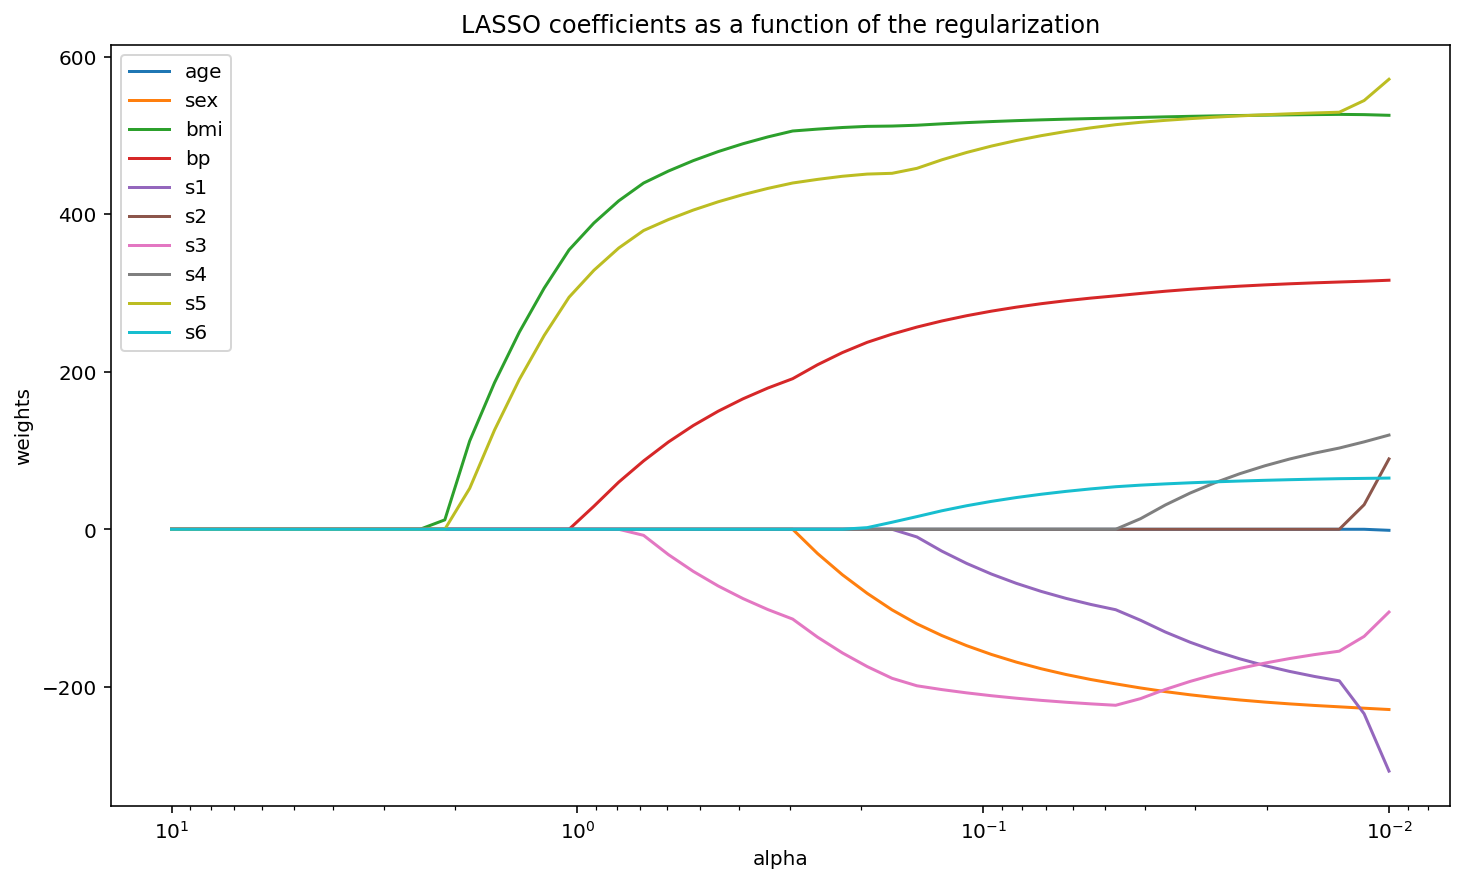

In [133]:
axis = plt.gca()
lineObject = axis.plot(alphas, coefs)
axis.legend(iter(lineObject), features)
axis.set_xscale('log')
axis.set_xlim(axis.get_xlim()[::-1]) #reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('LASSO coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

### Repitan el paso anterior, pero con el modelo Ridge.

In [136]:
regr = Ridge(alpha = 0.1)
regr.fit(x,y)
print("Coeficientes del modelo: ", regr.coef_)

Coeficientes del modelo:  [   1.30734895 -207.19481363  489.69108009  301.76943732  -83.46607377
  -70.82809551 -188.68016351  115.7127025   443.81405412   86.74853944]


In [137]:
alphas = np.logspace(-2,1,50)
coefs = []

In [138]:
for a in alphas:
    ridge = Ridge(alpha = a, fit_intercept = False)
    ridge.fit(x,y)
    coefs.append(ridge.coef_)

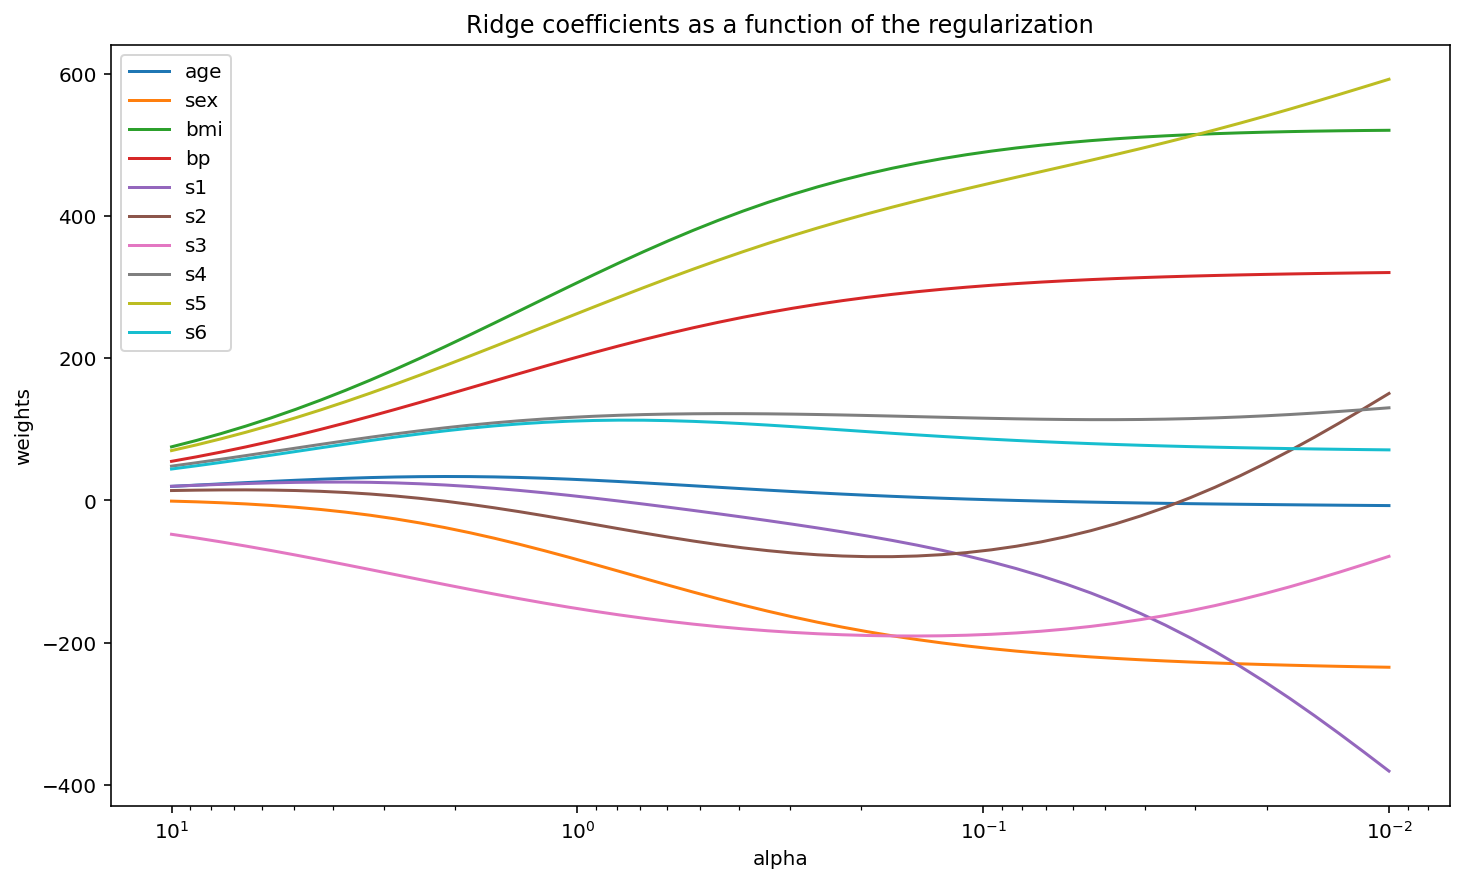

In [140]:
axis = plt.gca()
lineObject = axis.plot(alphas, coefs)
axis.legend(iter(lineObject), features)
axis.set_xscale('log')
axis.set_xlim(axis.get_xlim()[::-1]) #reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

### ¿Qué solución les da mayor información sobre la relevancia de las variables de entrada como predictoras de un modelo lineal?

En este caso, la solución que otorga Lasso aporta mayor información acerca de la relevancia de los predictores ya que es mucho más claro identificar los predictores cuyos coeficientes se hacen 0 conforme aumenta el parámetro alpha. Utilizando Ridge, los coeficientes tienen valores más parecidos y en la gráfica se cruzan mucho al variar alpha. <br>
Por ejemplo, tanto con el Lasso como con el Ridge se puede identificar que el bmi, s5 y el bp son las variables más relevantes sin embargo, es más fácil identificar estas variables con la gráfica del Lasso.